### Different Cereal brands with its nutritional values and customer ratings 

We have data from different manufacturer of Cereals and nutritional value that they offer. 
Also they have been rated on a scale of 100, as per their popularity. 
Here we will be checking the factors affecting the ratings and how strongly they affect 'rating', using regression

In [17]:
import numpy as np
import pandas as pd
import seaborn as sns;sns.set(style='ticks',color_codes=True)

import matplotlib.pyplot as plt
%matplotlib inline

cereal = pd.read_csv("DataSet//cereal.csv")
cereal.shape
cereal.iloc[:,3:]

,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,70,4,1,130,10.0,5.0,6,280,25,3,1.00,0.33,68.402973
1,120,3,5,15,2.0,8.0,8,135,0,3,1.00,1.00,33.983679
2,70,4,1,260,9.0,7.0,5,320,25,3,1.00,0.33,59.425505
3,50,4,0,140,14.0,8.0,0,330,25,3,1.00,0.50,93.704912
4,110,2,2,200,1.0,14.0,8,-1,25,3,1.00,0.75,34.384843
5,110,2,2,180,1.5,10.5,10,70,25,1,1.00,0.75,29.509541
6,110,2,0,125,1.0,11.0,14,30,25,2,1.00,1.00,33.174094
7,130,3,2,210,2.0,18.0,8,100,25,3,1.33,0.75,37.038562
8,90,2,1,200,4.0,15.0,6,125,25,1,1.00,0.67,49.120253
9,90,3,0,210,5.0,13.0,5,190,25,3,1.00,0.67,53.313813


#### Creating Function to get r-value (correlation coefficient) between X (different nutrition information variables) and Y (rating), $R^2 , Adjusted R^2$ and standard error 
$r=\frac{\sum_{i=1}^n ((x_i - x)(y_i - y)) }{\sqrt{\sum_{i=1}^n (x_i - x)^2\sum_{i=1}^n(y_i - y)^2}}$   

$r^2$ is coefficient of determination which gives proportion of varaince that is shared by both variables.

$r^2 = 1-\frac{\sum_{i=0}^n(y-\hat{y})^2}{\sum_{i=0}^n(y-\bar{y})^2}$ , where $\hat{y}$ and $\bar{y}$ are predicted values and mean values of 'y' variable 

Standard Error : $\sqrt{\frac{\sum_{i=1}^n(x-\mu)^2}{n-1}}$

In [100]:
def Pearson(x,y):
    '''
    Function to return r value for a dependent and independent variable se
    '''
    x_ = x-np.mean(x)
    y_ = y-np.mean(y)
    x_2 = np.power(x_,2).sum()
    y_2 = np.power(y_,2).sum()
    numer = np.multiply(x_,y_)
    numer_ = numer.sum()
    denom = np.multiply(x_2,y_2)
    denom_ = np.sqrt(denom)
    
    r = np.divide(numer_,denom_) 
    num_ = np.sqrt(numer_)
    n = len(x)-1
    std_err = np.divide(num_,n)     
    
    return (r,std_err)


76

#### Below functions:
1. Linear_func : returns the predicted value of Y, i.e. the line of best fit against X
2. residuals : this returns the array of difference between actual value and predicted value of Y. This means how far the actual value lies from the line of best fit.

In [83]:
def Linear_func(x,a,b):
    '''
    Function to define f(x) i.e. y as function of x
    where a id slope and b is intercept
    '''
    return np.multiply(a,x)+b

def residuals(y,y_predict):
    '''
    Function to get residuals : that is difference between actual and predicted values of Y
    '''
    return (y-y_predict)

def r_squared(y,y_res):
    num = np.power(y_res,2).sum()
    den = np.power((y-np.mean(y)),2).sum()
    r_squared = 1-np.divide(num,den)
    return r_squared

### Performing Data Analysis

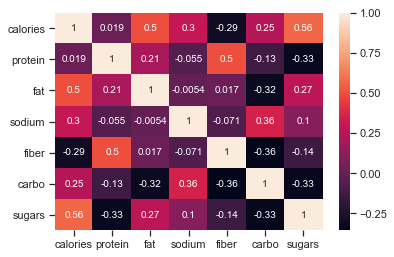

In [26]:
f = (cereal.loc[:,['calories','protein','fat','sodium','fiber','carbo','sugars']].dropna()).corr()
sns.heatmap(f,annot =True)

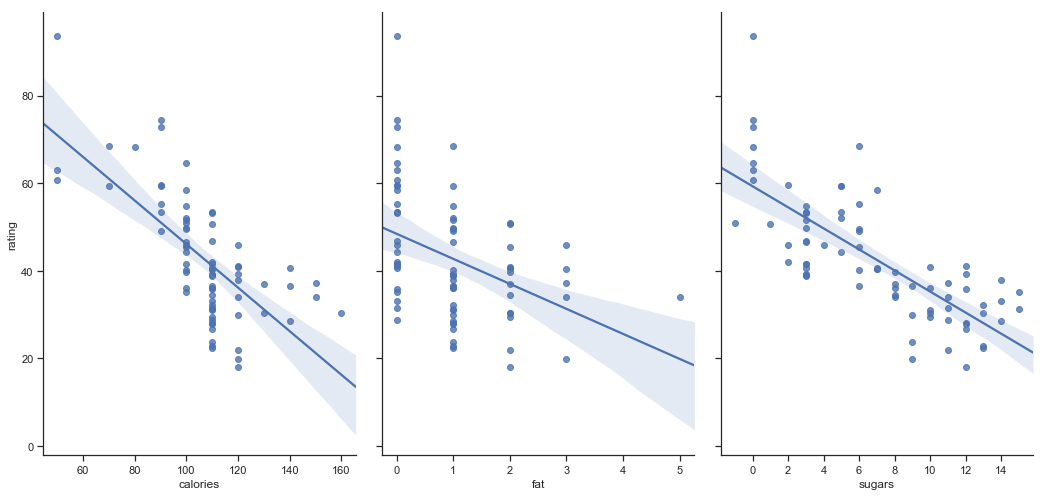

In [34]:
sns.pairplot(cereal,x_vars=['calories','fat','sugars'],y_vars='rating',kind='reg',height=7,aspect=0.7)

## Calculating correlation coefficient and residuals, after fitting the data

In [101]:
r,std_err = Pearson(cereal['calories'],cereal['rating'])
print('R_square: ',np.power(r,2))
print('Standard Error: ',std_err)

R_square:  0.4752393123451634
Standard Error:  nan


C:\Users\yjoshi\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in sqrt
  from ipykernel import kernelapp as app


In [68]:
from scipy.optimize import curve_fit
x = cereal['calories']
y = cereal['rating']
popt,pcov = curve_fit(Linear_func,x,y)
slope , intercept = popt
#predicted values for Y
y_ = Linear_func(x,*popt)
#residuals = y-y_
y_res = residuals(y,y_)
#getting r_squared value
r_squared(y,y_res)

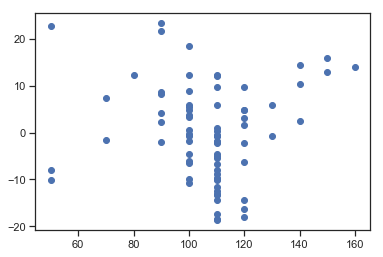

In [79]:
plt.scatter(x,y_res)

0.4752393123451638